# Understanding political polarity with Tweets

Goal: To combine textual Twitter data from politicians with sentiment
analysis to better understand the similarities/differences between
how national politicians speak.

## Generating a database

We're going to use Alex Litel's [congresstweets](https://github.com/alexlitel/congresstweets)
database for all of our political tweets.

To get started, let's load all of that data into a SQLite database.

In [114]:
# Create global variables

TWEETS_DIRECTORY = 'tweets'

In [115]:
# Clone the Tweets repo. This takes a few minutes to run at start.
import os.path
from git import Repo

if not os.path.isdir(TWEETS_DIRECTORY):
    Repo.clone_from('https://github.com/alexlitel/congresstweets', 'tweets')
    print('Cloned tweets repo...')
else:
    print('Using existing tweets repo...')

Using existing tweets repo...


In [116]:
# Get the filenames containing the tweets
from os import listdir
from os.path import isfile, join

file_path = join(TWEETS_DIRECTORY, 'data')

tweet_files = [f for f in listdir(file_path) if isfile(join(file_path, f))]

last_n = len(tweet_files)
# last_n = 20
print('Using the latest', last_n, 'files containing tweet data...')

tweet_files = tweet_files[-last_n:]

Using the latest 200 files containing tweet data...


In [117]:
import json

tweets = {}

for tweet_file in tweet_files:
    with open(join(TWEETS_DIRECTORY, 'data', tweet_file)) as f:
        todays_tweets = json.load(f)
        for tweet in todays_tweets:
            # add tweet as a key/value pair, ensures values are unique
            tweets[tweet['id']] = tweet

In [118]:
import numpy as np

# Add all tweets into a numpy array
tweets = np.array(list(tweets.values()))

print('Analyzing', len(tweets), 'tweets...')

Analyzing 492009 tweets...


# Add sentiment data to the tweets

Here we'll use VADER from nltk to generate sentiment stats for each tweet.

In [119]:
# Import and configure the sentiment analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [120]:
# Add sentiment data to each tweet
for tweet in tweets:
    sentiment_scores = analyser.polarity_scores(tweet['text'])
    tweet['sentiment'] = sentiment_scores

In [121]:
TWITTER_ACCOUNT_NAME = 'SenOssoff'

In [122]:
results = []

for tweet in tweets:
    if tweet['screen_name'] == TWITTER_ACCOUNT_NAME:
        results.append(tweet)

print('Found', len(results), 'matching tweets')

Found 108 matching tweets


In [139]:
import pickle

with open('tweets.pickle', 'wb') as f:
    pickle.dump(tweets, f)

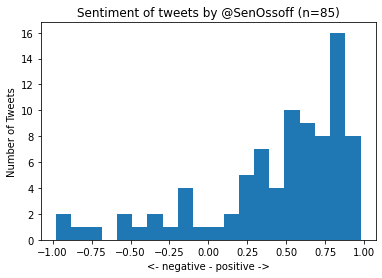

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

compound_values = [result['sentiment']['compound'] for result in results]

# Remove tweets with no true value. (nulls)
compound_values = [v for v in compound_values if v != 0.0]

n_bins = 20

plt.hist(compound_values, bins=n_bins)

plt.ylabel('Number of Tweets')
plt.title('Sentiment of tweets by @{0} (n={1})'.format(
    TWITTER_ACCOUNT_NAME,
    len(compound_values)
  ))
plt.xlabel('<- negative - positive ->')

plt.show()